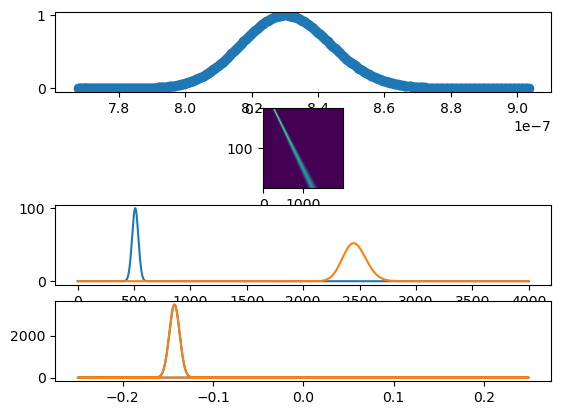

: 

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import constants as c 
n = 1.452
dndl= -.015e6 
d2ndl2= .03e12
d3ndl3=-.175e18
kc = 12048e2
dk = 195.9645e2 
fc = .357
df = .00574
Nks = 400

ks = np.linspace(kc-5*dk,kc+5*dk,Nks)
fs = np.linspace(fc-5*df,fc+5*df,Nks)
cks =np.exp(-1/2*((ks-kc)/dk)**2)
fig,axs = plt.subplots(4)
wl = 1/ks  
n =  dndl*wl+d2ndl2*wl**2+d3ndl3*wl**3 
axs[0].scatter(1/ks,cks)
Nt = 2000
Nx = 200
x = np.linspace(0,2e-2,Nx)
t = np.linspace(0,4000,Nt)
tt,xx = np.meshgrid(t,x)
kn = ks*1.452 
E = np.zeros(tt.shape,dtype='complex128')
for i,k in enumerate(ks): 
    E += cks[i]*np.exp(1.0j*(np.pi*2*fs[i]*(tt-500)-n[i]*k*xx))
axs[1].imshow(np.abs(E),aspect=10)
axs[2].plot(t,np.abs(E[1,:]))
axs[2].plot(t,np.abs(E[-1,:]))
axs[3].plot(np.fft.fftfreq(Nt,t[1]-t[0]),np.abs(np.fft.fft(E[1,:])))
axs[3].plot(np.fft.fftfreq(Nt,t[1]-t[0]),np.abs(np.fft.fft(E[-1,:])))

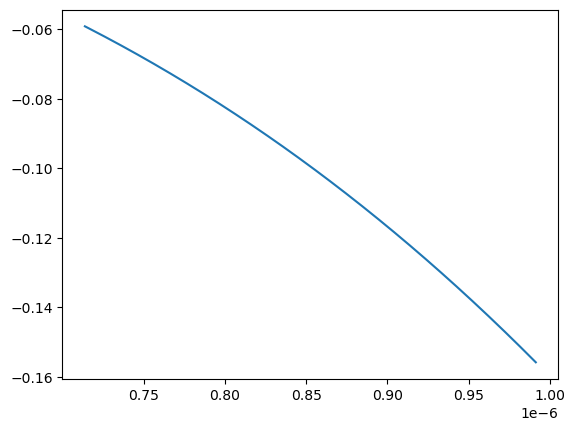

In [7]:
wl = 1/ks  
n =  dndl*wl+d2ndl2*wl**2+d3ndl3*wl**3 
plt.plot(wl,n)